In [34]:
#2.load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
data['age'] = data['Rings']+1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

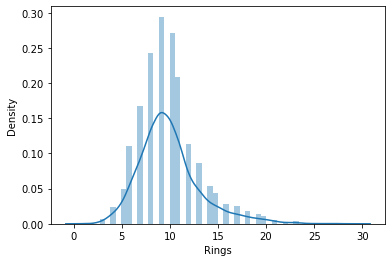

In [35]:
#perform visualization
#univariate analysis

import seaborn as sns
sns.distplot(data.Rings)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings', ylabel='Height'>

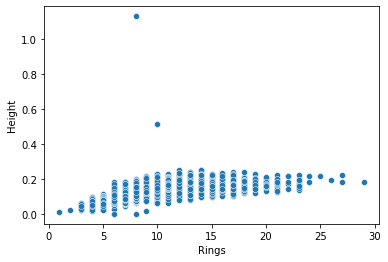

In [30]:
#bivariate analysis
sns.scatterplot(data.Rings,data.Height)

In [31]:
data.drop('Rings', axis=1, inplace=True)


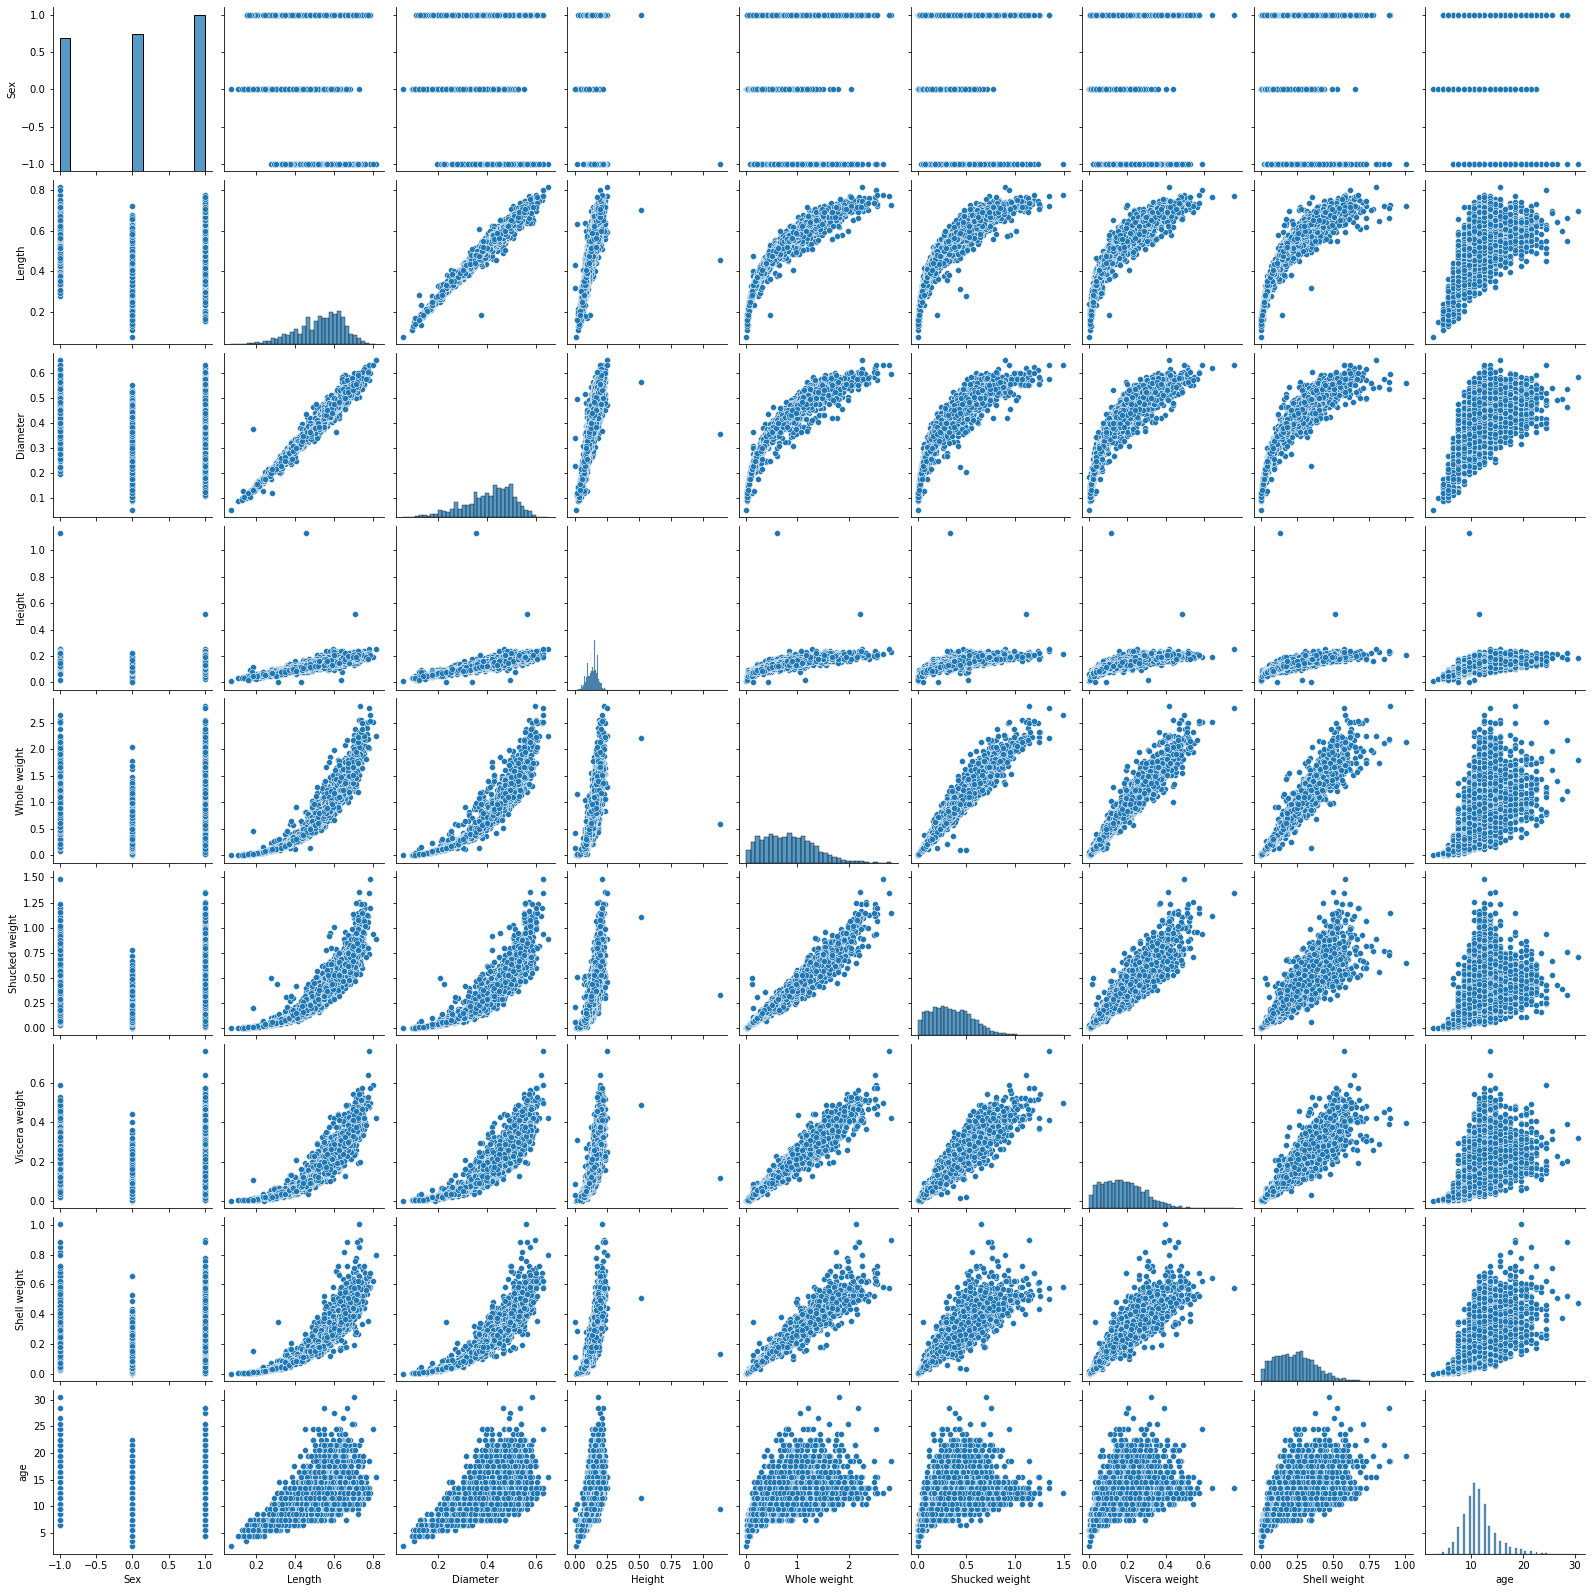

In [24]:
#multivariate analysis
sns.pairplot(data)


In [4]:
#4. Perform descriptive statistics on the dataset
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [5]:
#5. Check for Missing values and deal with them
data.isna().mean().to_frame(name='missing values') # No missing values


,missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
age,0.0


In [6]:
#variable separation
numeric_features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
categorical_features =['Sex']
target_label ='age'

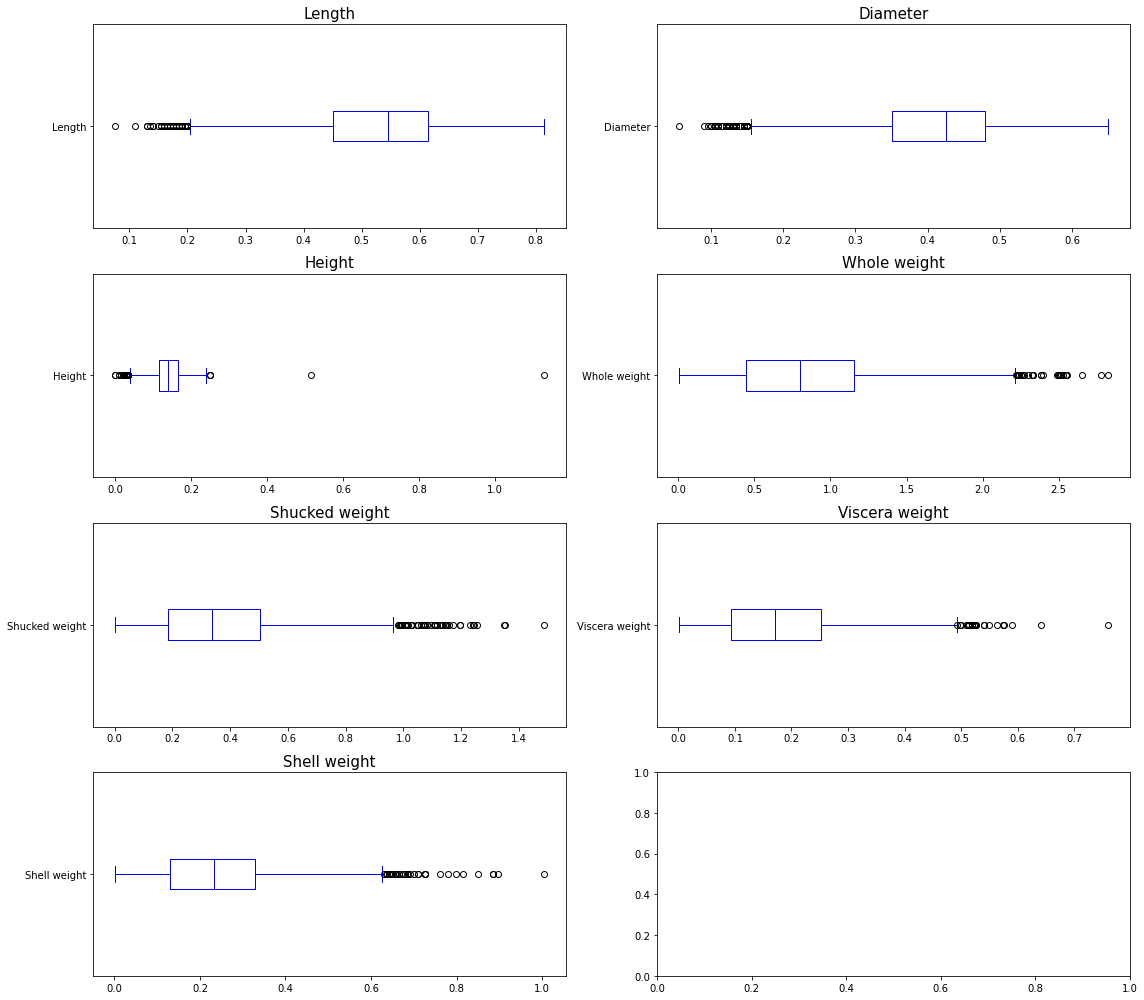

In [11]:
#6. Find the outliers and replace them outliers
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numeric_features):
    hist = data[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()
#Most of the features contain outliers.
#'Height' feature as extreme outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x12c096ff9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12c096fff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c096ff6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12c0887e580>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c0887e850>],
 'means': []}

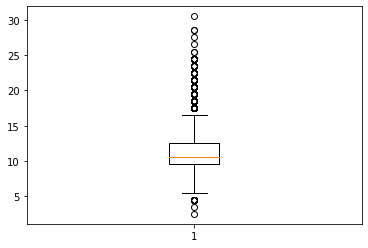

In [12]:
#6. Find the outliers and replace them outliers
plt.boxplot(data['age'])

In [13]:
#removing outliers
idx = data.loc[data.Height>0.4].index
data.drop(idx, inplace=True)

idx = data.loc[data['Viscera weight']>0.6].index
data.drop(idx, inplace=True)

idx = data.loc[data[target_label]>25].index
data.drop(idx, inplace=True)

In [14]:
#7. Check for Categorical columns and perform encoding.
data.info()
#sex is the categorical column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4166 non-null   object 
 1   Length          4166 non-null   float64
 2   Diameter        4166 non-null   float64
 3   Height          4166 non-null   float64
 4   Whole weight    4166 non-null   float64
 5   Shucked weight  4166 non-null   float64
 6   Viscera weight  4166 non-null   float64
 7   Shell weight    4166 non-null   float64
 8   age             4166 non-null   float64
dtypes: float64(8), object(1)
memory usage: 325.5+ KB


In [7]:
#perform encoding
data.Sex = data.Sex.replace({"M":1,"I":0,"F":-1})
data.head()
#now all the column are numeric

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [8]:
#8. Split the data into dependent and independent variables
features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex']
X = data[features]
target ='age'


In [9]:
#9. Scale the independent variables
from sklearn.preprocessing import MinMaxScaler
scale1 = MinMaxScaler()
xscaled = scale1.fit_transform(X)


In [10]:
#10. Split the data into training and testing
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size =0.3,random_state =1)
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [12]:
#11. Build the Model
model = DecisionTreeRegressor(random_state =1)

In [13]:
#12. Train the Model
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [14]:
#13.Test the model
y_test =model.predict(X_test)
y_test

array([12.5, 10.5, 10.5, ...,  9.5, 10.5,  7.5])

In [15]:
y_preds = model.predict(X_train)

In [16]:
#Evaluating the score of our model
import math
from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_train,y_preds)))


0.0


In [17]:
print(r2_score(y_train,y_preds))

1.0


In [114]:
print(y_train)

1041    11.5
3967     7.5
1523    13.5
1958    11.5
3288    16.5
        ... 
2904    10.5
2772    11.5
907      7.5
3991    10.5
235     10.5
Name: age, Length: 2916, dtype: float64


In [116]:
print(y_preds)

[11.5  7.5 13.5 ...  7.5 10.5 10.5]


In [18]:
model2 = RandomForestRegressor(random_state =1)

In [19]:
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [20]:
y_test = model2.predict(X_test)
y_test

array([11.63, 10.37, 10.27, ..., 10.25, 10.  ,  7.2 ])

In [21]:
y_preds = model2.predict(X_train)

In [22]:
#Evaluating the score of our model
import math

from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_train,y_preds)))


0.7635692337198666
